## 2_1_1 주성분분석 시행

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
import numpy as np 
import pandas as pd
import random
random.seed(314)

# 데이터 차원(열) 축소(dimension reduction)
from sklearn.decomposition import PCA # 주성분분석

# 시각화 도구 
from IPython.core.pylabtools import figsize # ipython 사용 시 그래프 출력 크기 설정
import matplotlib.pyplot as plt 

# matplotlib 기본 설정

import matplotlib
from matplotlib import rc 
%matplotlib inline
# rc('font', family='AppleGothic')
rc('font', family='NanumBarunGothic')

plt.rcParams['axes.unicode_minus'] = False

# x축 y축 그리드
matplotlib.rcParams['grid.color'] = 'gray' # 그리드 색상
matplotlib.rcParams['grid.linestyle'] = 'dotted' # 그리드 선 유형
matplotlib.rcParams['grid.linewidth'] = 0.5 # 그리드 선 굵기

# 좌표 값의 설정
matplotlib.rcParams['axes.facecolor'] = '#F0F0F0' # 도표 내 색상
matplotlib.rcParams['axes.axisbelow'] = False # 그리드를 차트에서 항상 위로 할 경우 False로 설정
matplotlib.rcParams['axes.labelcolor'] = 'k' # x, y 축 글 색상
matplotlib.rcParams['axes.grid'] = True # 그리드 사용 여부
matplotlib.rcParams['axes.edgecolor'] = '#E6E6E6' # 도표 윤곽선 색상
matplotlib.rcParams['axes.unicode_minus'] = False # 도표값에 -를 unicode로 사용할지 여부, 깨지면 False 추천
matplotlib.rcParams['xtick.color'] = 'gray' # x축 라벨 색상
matplotlib.rcParams['ytick.color'] = 'gray' # y축 라벨 색상
matplotlib.rcParams['xtick.alignment'] = 'center' # x축 라벨 위치 정렬

In [3]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

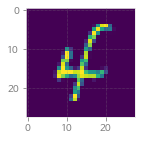

In [4]:
plt.figure(figsize=(2, 2))
rand_num = random.randint(0, len(X_train) - 1)
plt.imshow(X_train[rand_num])
plt.show()

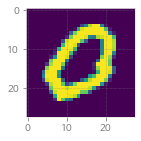

In [5]:
plt_num = 0 
plt.figure(figsize=(2, 2))
X_train_num = X_train[y_train == plt_num]
rand_num = random.randint(0, len(X_train_num) - 1)
plt.imshow(X_train_num[rand_num])
plt.show()

In [6]:
# 0인 데이터만 불러오기 
X_train_0 = X_train[y_train == 0]
n_row, n_xaxis, n_yaxis = X_train_0.shape
X_train_0 = X_train_0.reshape(len(X_train_0), n_xaxis * n_yaxis)
print(X_train_0.shape) # (5923, 784)

(5923, 784)


In [7]:
# 주성분분석 시행 
from sklearn.decomposition import PCA

pca = PCA(n_components = 784)
# PCA 결과 데이터프레임 
X_train_PCA = pca.fit_transform(X_train_0)
print(X_train_PCA.shape)

(5923, 784)


In [8]:
# 주성분분석 결과 n번째 성분 샘플 보기

print_cols = [0, 100, 200, 300, 400, 500, 600, 700]
np.array(X_train_PCA[:10, print_cols], dtype=int)

array([[ -454,   -13,     2,    15,     1,     0,     0,     0],
       [ -329,    10,    14,     7,     0,     0,     0,     0],
       [-1244,    21,   -13,    39,     1,     0,     0,     0],
       [-1251,   -30,     0,   -22,    -3,     0,     0,     0],
       [  371,   -11,   -19,     1,     0,     0,     0,     0],
       [  838,    76,   -31,    -9,     7,     0,     0,     0],
       [ -426,    14,    27,    23,     5,     0,     0,     0],
       [  793,    14,    20,     5,   -20,     0,     0,     0],
       [ -613,     6,    99,    28,    -4,     0,     0,     0],
       [ -807,   -18,    26,    -8,     0,     0,     0,     0]])

In [9]:
# 주성분분석 결과의 기술 통계 
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.describe().round(2).loc[:, print_cols]

,0,100,200,300,400,500,600,700
count,5923.00,5923.00,5923.00,5923.00,5923.00,5923.00,5923.0,5923.0
mean,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.0,0.0
std,753.16,47.68,26.04,17.49,8.97,1.19,0.0,0.0
min,-1583.95,-185.33,-107.16,-71.00,-66.84,-21.84,-0.0,-0.0
25%,-642.31,-29.87,-16.86,-11.02,-3.35,-0.24,-0.0,-0.0
50%,-15.17,-0.57,-0.09,-0.28,0.07,0.00,-0.0,0.0
75%,643.27,31.05,16.79,11.42,3.52,0.25,0.0,0.0
max,1657.48,192.24,123.52,93.16,84.39,30.06,0.0,0.0


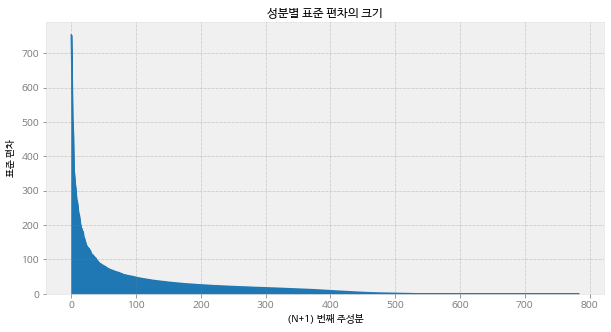

In [10]:
# Pandas의 plot()을 이용한 간단 시각화 
plt.figure(figsize=(10,5))
# 변수가 많은 경우 막대(bar)보다는 영역(area)이 표현에 유리
X_train_PCA.describe().loc['std'].plot(kind='area')
plt.title('성분별 표준 편차의 크기')
plt.ylabel('표준 편차')
plt.xlabel('(N+1) 번째 주성분')
plt.show()

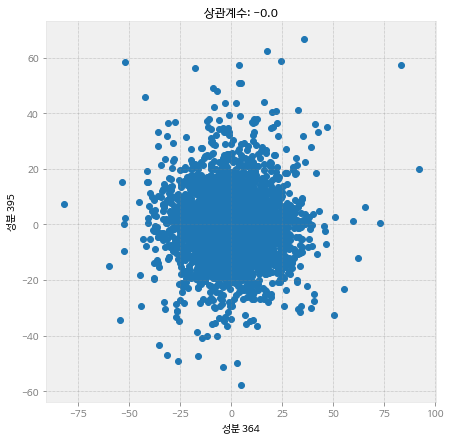

In [11]:
# 주성분분석 성분간 상관계수 
# 400 (0 ~ 399) 번째 성분 중 두 성분을 임의 추출
j = np.random.randint(0, 400)
k = np.random.randint(0, 400)

if j == k:
  k = j + 1 

# 상관계수 
corrcoef_ = np.corrcoef(X_train_PCA.iloc[:, j], X_train_PCA.iloc[:, k])[0, 1]
corrcoef_ = np.round(corrcoef_, 4)

# 시각화 
plt.figure(figsize=(7, 7))
plt.scatter(X_train_PCA.iloc[:, j], X_train_PCA.iloc[:, k])
plt.title('상관계수: ' + str(corrcoef_))
plt.xlabel('성분 ' + str(j + 1))
plt.ylabel('성분 ' + str(k + 1))
plt.show()

## 2_1_2 주성분분석 해석

In [15]:
# 주성분분석 설명된 분산
pca.explained_variance_[:10]

array([567256.85692849, 407965.73262991, 257402.56682999, 215674.95059997,
       130735.3079817 , 115421.02049092, 100191.43232102,  90892.99024019,
        75506.30155684,  72327.91683239])

In [16]:
# 원데이터와 주성분분석 설명된 분산비교
explvar_raw = np.sum(np.var(X_train_0, axis = 0))
explvar_pca = np.sum(pca.explained_variance_)
explvar_error = ((explvar_pca / explvar_raw) - 1) * 100 
explvar_ratio = np.round(1 - explvar_error / 100, 3)
if explvar_ratio == 1:
  explvar_match = '일치'
else:
  explvar_match = '불일치'

print("원 데이터의 분산 : %i, 주성분분석 후의 분산 : %i로, \n오차는 약 %.2f%%이고, 두 값은 %s한다고 말할 수 있다." % (explvar_raw, explvar_pca, explvar_error, explvar_match))

원 데이터의 분산 : 3245975, 주성분분석 후의 분산 : 3246523로, 
오차는 약 0.02%이고, 두 값은 일치한다고 말할 수 있다.


In [17]:
pca.explained_variance_ratio_[:10]

array([0.17472746, 0.12566233, 0.07928559, 0.06643258, 0.04026932,
       0.03555219, 0.03086114, 0.02799702, 0.02325758, 0.02227857])

In [18]:
explvar_pct = np.sum(pca.explained_variance_ratio_[:10]) * 100 
print("주성분 10개의 설명된 분산 비율은 전체 중 %i%%를 포함한다." % (explvar_pct))

주성분 10개의 설명된 분산 비율은 전체 중 62%를 포함한다.


In [19]:
# 주성분분석의 고유값 (손글씨 0)
print(len(pca.singular_values_))
pca.singular_values_[:10]

784


array([57959.42638373, 49152.54895358, 39042.77142785, 35738.31357875,
       27824.71013088, 26144.27821431, 24358.4412926 , 23200.60965152,
       21145.88181702, 20696.0364196 ])

In [23]:
# MNIST 시각화 함수 
def plot_mnist(data, p_row, p_col, size, title = False):
  fig, axis = plt.subplots(p_row, p_col, figsize=(p_col * size, p_row * size), subplot_kw = {'xticks' : [], 'yticks' : []}, gridspec_kw = dict(hspace=0.1, wspace=0.1))
  for i, ax in enumerate(axis.flat):
    ax.imshow(data[i], cmap='gray')
  if title:
    fig.suptitle(title)

28

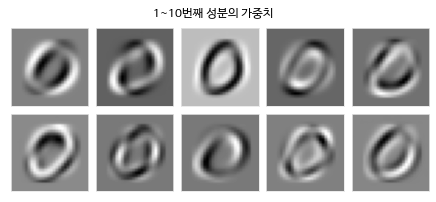

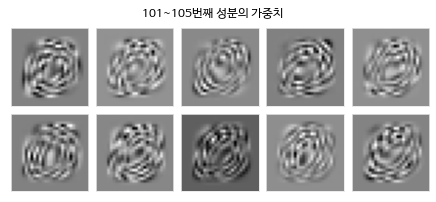

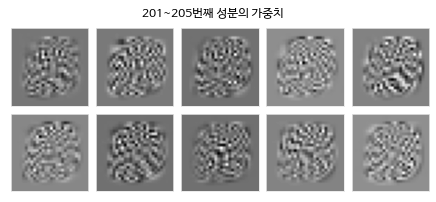

In [24]:
# 고유벡터의 성분값 시각화 (손글씨 0)
plt_data = pca.components_.reshape(len(pca.components_), n_xaxis, n_yaxis)
plot_mnist(plt_data, 2, 5, 1.5, '1~10번째 성분의 가중치')
plot_mnist(plt_data[100:], 2, 5, 1.5, '101~105번째 성분의 가중치')
plot_mnist(plt_data[200:], 2, 5, 1.5, '201~205번째 성분의 가중치')
plt.show()

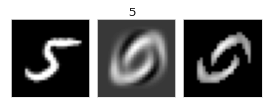

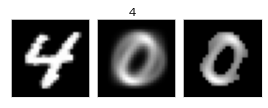

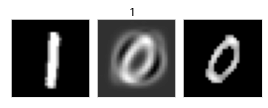

In [29]:
# MNIST 0값만으로 주성분분석하고 복구해보기 
pca = PCA(n_components = 3)
X_train_PCA = pca.fit(X_train_0)
X_train_PCA_0fit = pca.transform(X_train.reshape(len(X_train) , n_xaxis * n_yaxis))
X_train_PCA_inv = pca.inverse_transform(X_train_PCA_0fit)
X_train_PCA_inv = X_train_PCA_inv.reshape(len(X_train), n_xaxis, n_yaxis)

for i in range(3):
  ran_num = np.random.randint(len(X_train))
  print_list = []
  
  print_list.append(X_train[ran_num])
  print_list.append(X_train_PCA_inv[ran_num])
  print_list.append(X_train_PCA_inv[ran_num] * (X_train_PCA_inv[ran_num] > 70))
  plot_mnist(print_list, 1, 3, 1.5, str(y_train[ran_num]))

## 2_1_3 MNIST 노이즈 제거

In [30]:
def add_uniform_noise(df, noise_pct = 0.1):
  min_df = np.min(df)
  max_df = np.max(df)
  high_df = ((max_df - min_df) * noise_pct) + min_df 
  return df + np.random.uniform(low = min_df, high=high_df, size= df.shape)

X_train_noise = add_uniform_noise(X_train, 0.4)
X_test_noise = add_uniform_noise(X_test, 0.4)

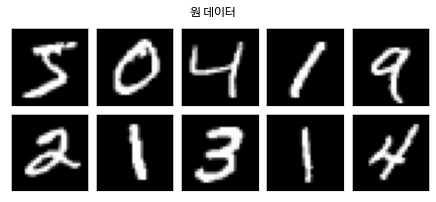

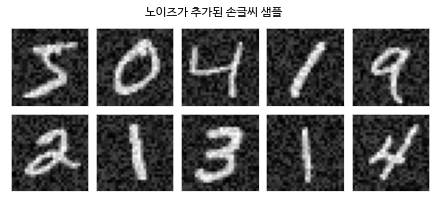

In [31]:
plot_mnist(X_train, 2, 5, 1.5, '원 데이터')
plt.show()
plot_mnist(X_train_noise, 2, 5, 1.5, '노이즈가 추가된 손글씨 샘플')
plt.show()

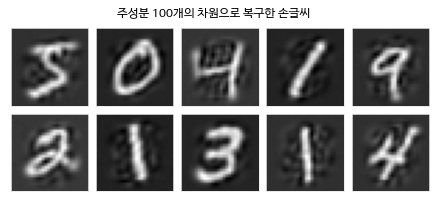

In [32]:
# 노이즈 추가된 손글씨의 주성분분석과 복구 결과
from sklearn.decomposition import PCA

pca = PCA(n_components = 100)
n_row, n_xaxis, n_yaxis = X_train_noise.shape 
X_train_noise_PCA = pca.fit_transform(X_train_noise.reshape(n_row, n_xaxis * n_yaxis))
X_train_noise_PCA_inv = pca.inverse_transform(X_train_noise_PCA)
X_train_noise_PCA_inv = X_train_noise_PCA_inv.reshape(n_row, n_xaxis, n_yaxis)

plot_mnist(X_train_noise_PCA_inv, 2, 5, 1.5, '주성분 100개의 차원으로 복구한 손글씨')
plt.show()

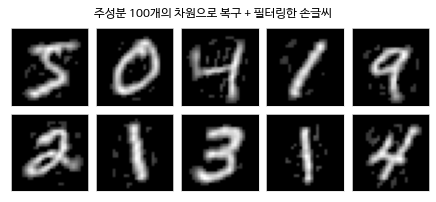

In [33]:
# 노이즈 데이터 복구 및 필터링
filtering = X_train_noise_PCA_inv * (X_train_noise_PCA_inv > 70)
plot_mnist(filtering, 2, 5, 1.5, '주성분 100개의 차원으로 복구 + 필터링한 손글씨')

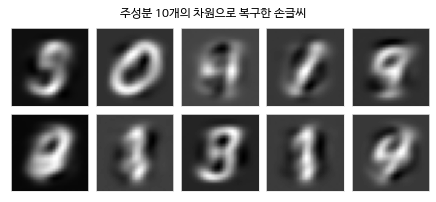

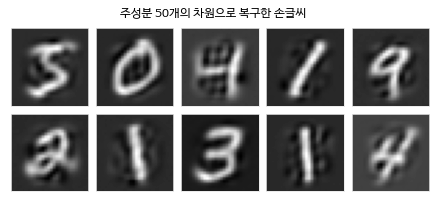

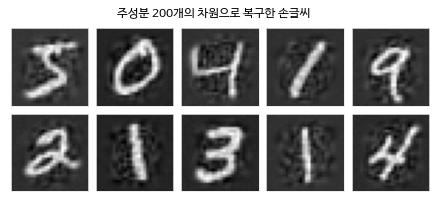

In [34]:
# 성분의 증가에 따른 복구 데이터 시각화 
for nc in [10, 50, 200]:
  pca = PCA(n_components = nc)
  n_row, n_xaxis, n_yaxis = X_train_noise.shape
  X_train_noise_PCA = pca.fit_transform(X_train_noise.reshape(n_row, n_xaxis * n_yaxis))
  X_train_noise_PCA_inv = pca.inverse_transform(X_train_noise_PCA)
  X_train_noise_PCA_inv = X_train_noise_PCA_inv.reshape(n_row, n_xaxis, n_yaxis)

  plot_mnist(X_train_noise_PCA_inv, 2, 5, 1.5, '주성분 %i개의 차원으로 복구한 손글씨' % nc)

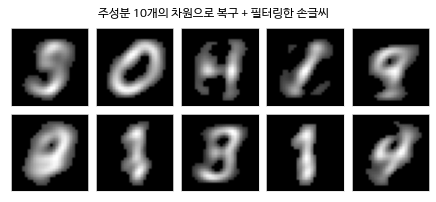

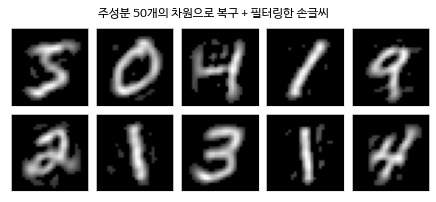

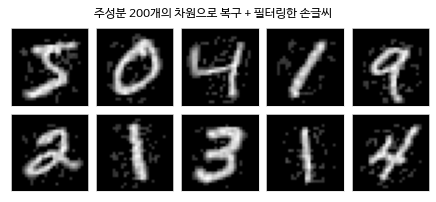

In [35]:
# 성분의 증가 및 필터링에 따른 복구 데이터 시각화 변화  
for nc in [10, 50, 200]:
  pca = PCA(n_components = nc)
  n_row, n_xaxis, n_yaxis = X_train_noise.shape
  X_train_noise_PCA = pca.fit_transform(X_train_noise.reshape(n_row, n_xaxis * n_yaxis))
  X_train_noise_PCA_inv = pca.inverse_transform(X_train_noise_PCA)
  X_train_noise_PCA_inv = X_train_noise_PCA_inv.reshape(n_row, n_xaxis, n_yaxis)

  filtering = X_train_noise_PCA_inv * (X_train_noise_PCA_inv > 70)
  plot_mnist(filtering, 2, 5, 1.5, '주성분 %i개의 차원으로 복구 + 필터링한 손글씨' % nc)